In [34]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
melt_file = 'IN_fullbasin_meltcontributionstytype_500m.txt'
precip_file = 'IN_v01_fullbasinmasks.MERRA_rainfall_km3.annual_mean.by_elev.txt'

melt_df = pd.read_csv(melt_file, sep='\s+')
print(melt_df)

prec_df = pd.read_csv(precip_file, sep='\s+')
print(prec_df)


      exposed_glacier_ice  snow_on_ice  snow_on_land
0                0.000000     0.000000      0.000000
500              0.000000     0.000000      0.000000
1000             0.000000     0.000000      0.000362
1500             0.000000     0.000000      1.178719
2000             0.000000     0.000000     28.244779
2500             0.001341     0.004031     39.831208
3000             0.084324     0.158683     42.151725
3500             0.317704     0.585463     44.161797
4000             1.187601     4.210536     41.783655
4500             2.348431    10.559945     19.046297
5000             1.330488     7.204429      5.902753
5500             0.176473     1.483639      1.065484
6000             0.000988     0.014162      0.002371
6500             0.000000     0.000000      0.000000
7000             0.000000     0.000000      0.000000
7500             0.000000     0.000000      0.000000
8000             0.000000     0.000000      0.000000
8500             0.000000     0.000000      0.

In [36]:
melt_cum = melt_df.sort_index(ascending=False).cumsum()
prec_cum = prec_df.sort_index(ascending=False).cumsum()

print(melt_cum)
print(prec_cum)

      exposed_glacier_ice  snow_on_ice  snow_on_land
8500             0.000000     0.000000      0.000000
8000             0.000000     0.000000      0.000000
7500             0.000000     0.000000      0.000000
7000             0.000000     0.000000      0.000000
6500             0.000000     0.000000      0.000000
6000             0.000988     0.014162      0.002371
5500             0.177461     1.497801      1.067855
5000             1.507949     8.702230      6.970608
4500             3.856380    19.262175     26.016905
4000             5.043981    23.472711     67.800560
3500             5.361685    24.058174    111.962357
3000             5.446009    24.216857    154.114082
2500             5.447350    24.220888    193.945290
2000             5.447350    24.220888    222.190069
1500             5.447350    24.220888    223.368788
1000             5.447350    24.220888    223.369150
500              5.447350    24.220888    223.369150
0                5.447350    24.220888    223.

In [37]:
all_contribs = pd.concat((melt_cum, prec_cum), axis=1)

print(all_contribs)

      exposed_glacier_ice  snow_on_ice  snow_on_land      precip
8500             0.000000     0.000000      0.000000    0.000000
8000             0.000000     0.000000      0.000000    0.000000
7500             0.000000     0.000000      0.000000    0.002757
7000             0.000000     0.000000      0.000000    0.033086
6500             0.000000     0.000000      0.000000    0.166714
6000             0.000988     0.014162      0.002371    1.899086
5500             0.177461     1.497801      1.067855   23.322286
5000             1.507949     8.702230      6.970608   68.832350
4500             3.856380    19.262175     26.016905  125.182979
4000             5.043981    23.472711     67.800560  154.789614
3500             5.361685    24.058174    111.962357  169.279129
3000             5.446009    24.216857    154.114082  179.116150
2500             5.447350    24.220888    193.945290  187.319893
2000             5.447350    24.220888    222.190069  195.696543
1500             5.447350

In [38]:
# Calculate contributions as fraction of total.  Drop all rows with all zeros first.

all_contribs = all_contribs[(all_contribs.T != 0).any()]        # drop zero rows

sums = all_contribs.sum(axis=1)
print("SUMS\n", sums)
all_contribs_fraction = all_contribs.divide(sums.values, axis='index')
all_contribs_fraction.index.name = 'Elevation (m)'

print("FRACTIONS")
print(all_contribs_fraction)

SUMS
 7500      0.002757
7000      0.033086
6500      0.166714
6000      1.916607
5500     26.065403
5000     86.013137
4500    174.318439
4000    251.106866
3500    310.661345
3000    362.893098
2500    410.933421
2000    447.554850
1500    458.783490
1000    467.620931
500     480.069024
0       513.233145
dtype: float64
FRACTIONS
               exposed_glacier_ice  snow_on_ice  snow_on_land    precip
Elevation (m)                                                          
7500                      0.000000     0.000000      0.000000  1.000000
7000                      0.000000     0.000000      0.000000  1.000000
6500                      0.000000     0.000000      0.000000  1.000000
6000                      0.000515     0.007389      0.001237  0.990858
5500                      0.006808     0.057463      0.040968  0.894760
5000                      0.017532     0.101173      0.081041  0.800254
4500                      0.022123     0.110500      0.149249  0.718128
4000             

In [39]:
all_contribs_fraction.sum(axis=1)

Elevation (m)
7500    1.0
7000    1.0
6500    1.0
6000    1.0
5500    1.0
5000    1.0
4500    1.0
4000    1.0
3500    1.0
3000    1.0
2500    1.0
2000    1.0
1500    1.0
1000    1.0
500     1.0
0       1.0
dtype: float64

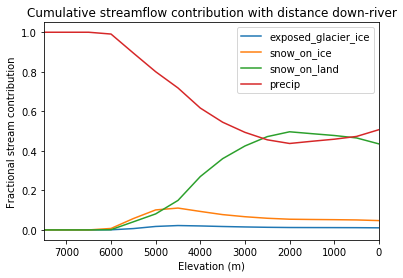

In [40]:
ax = all_contribs_fraction.plot(title='Cumulative streamflow contribution with distance down-river')
ax.set_ylabel('Fractional stream contribution')

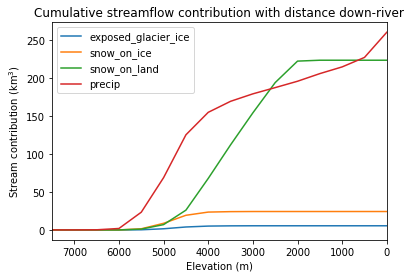

In [45]:
ax = all_contribs.plot(title='Cumulative streamflow contribution with distance down-river')
ax.set_ylabel(r'Stream contribution (km$^3$)')